Author: Nedal Mohammad

# Back Ground and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

# Objective

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

### Data Dictionary

In [1]:
#IMPORTS
import pandas as pd #data frame manipulation
# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

import numpy as np #various useful maths
import seaborn as sns #creating plots

import matplotlib.pyplot as plt #creating plots
%matplotlib inline 

#feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Library to split data
from sklearn.model_selection import train_test_split

# To build sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#prepruning decision tree - hyperparameter gridsearch
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

#random imports
import warnings
warnings.filterwarnings('ignore')

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# Exploratory Data Analysis

In [2]:
data = pd.read_csv('Loan_Modelling.csv') #load in the data
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.') #Find the number of rows and columns
data.head() #take a peak at the data

There are 5000 rows and 14 columns.


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.isnull().values.any() #If there are any null values in data set

False

There are no null values in the data.

In [4]:
data.drop(['ID'],axis=1,inplace=True)

Dropping the ID column because it is just a repeat of the index created by pandas

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


There are 5000 rows in the data and 14 columns. None of the columns contain null values and all of the values are numeric. Looking closer at the columns I can see that the data has been preprocessed or is just incredibly clean. Label Encoding was used on some columns (i.e. Education) to get them to this state but the columns do appear to be ordinal in nature so this is fine. 



In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


From here we can see a few things:
* The age of the bank's customers ranges from 23-67
* The minimum value in experience is negative, this is most likely some sort of error and I will have to investigate this and see how one might go about fixing it. We can make a decision after EDA
* The Income column is postively skewed (mean > median)
* the zipcodes range from 90005 to 96651, I'm not sure what the model will be able to do with this column so lets leave it alone and see how much importance it carries in the model
* Family sizes range from 1-4 people
* There may be some positive skew in the CCAvg column (mean> median)
* we can see that the minimum and the median of the mortgage column are both 0. This indicates that over half of the values are 0 for this column. So we deffinitely have a positive skew here (mean> median)
* the remaining columns are categorical and there isn't much to see here for those, we will have to visualize those.

## Univariate analysis

In [7]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = False, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    
def perc_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

The above functions will help me to visualize the data. 
Lets start with age.

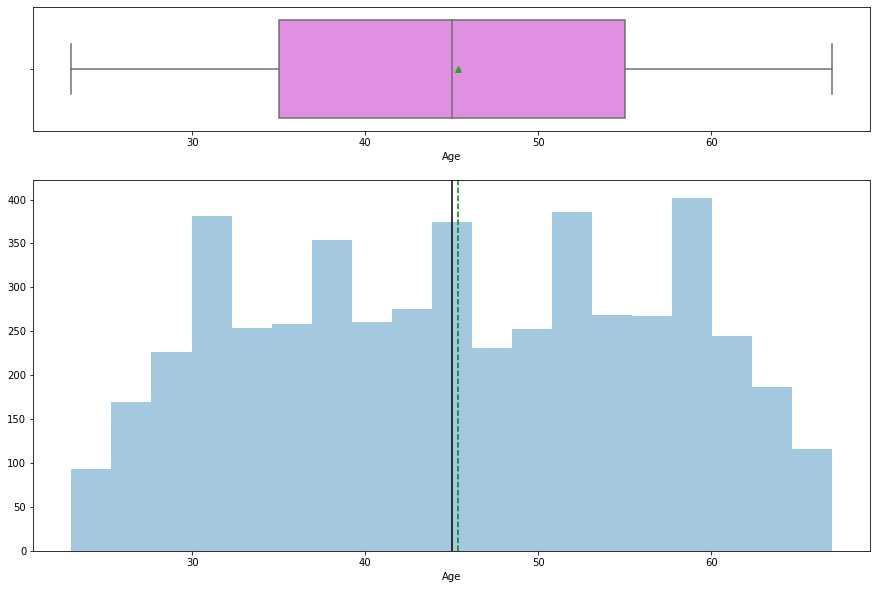

In [8]:
histogram_boxplot(data['Age'])

* There isn't any skew worth mentioning here. 
* There are not any outliers 
* most customers are between 35 and 55 years old

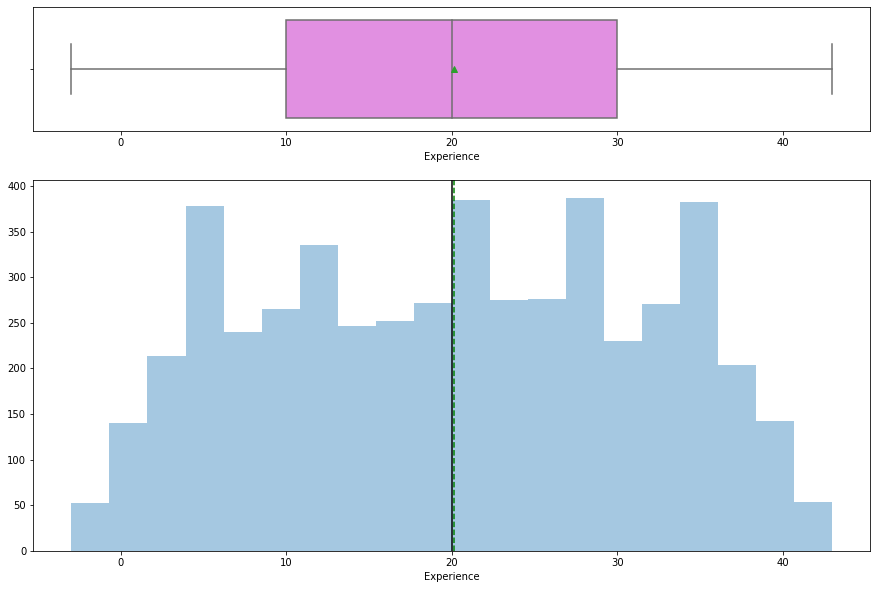

In [9]:
histogram_boxplot(data['Experience'])

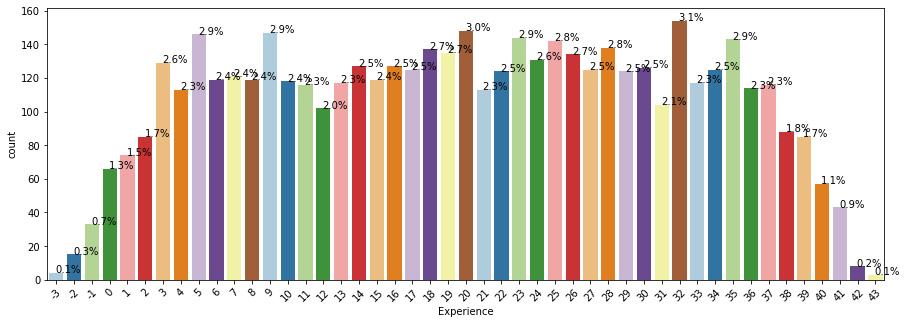

In [10]:
perc_on_bar(data, 'Experience')

* There isn't any skew  
* There are not any outliers 
* There are a decent number of negative values though, not just a few like I was hoping.. so I need to investigate this and see about fixing these values somehow

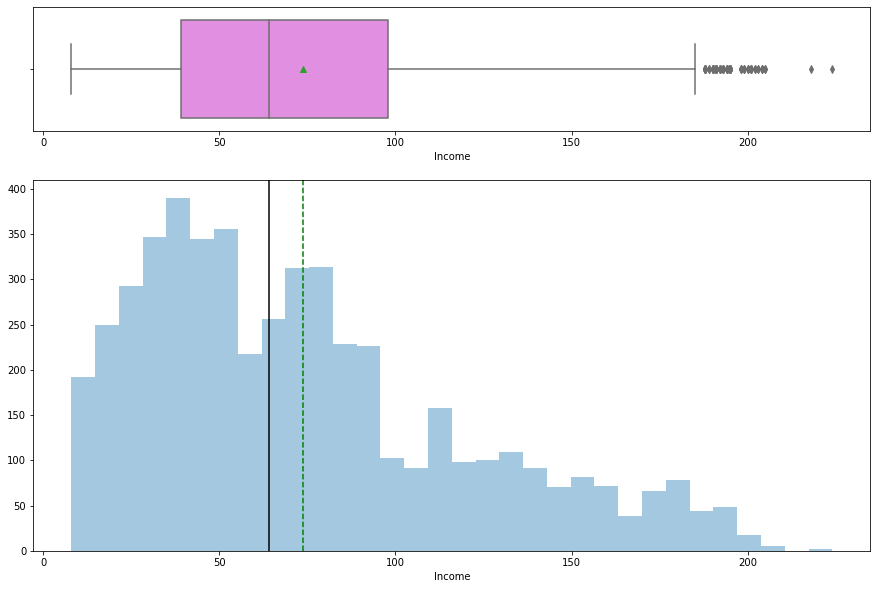

In [11]:
histogram_boxplot(data['Income'])

We can see a positive skew in the Income data and also some outliers on the upper end. I may want to consider capping these values if my first models perform very poorly, otherwise I will leave them as there don't seem to be many.

There are 467 unique zipcodes


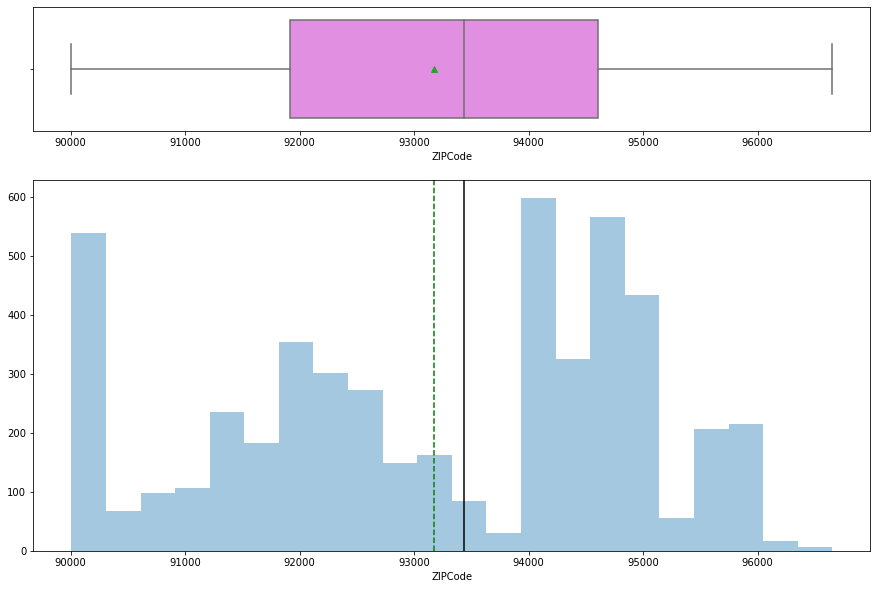

In [12]:
print('There are',data['ZIPCode'].nunique(), 'unique zipcodes')
histogram_boxplot(data['ZIPCode'])

I am very curious to see what the model can do with this information and if it carries any relevance at all.
* we do not see any outliers in zipcodes which is good

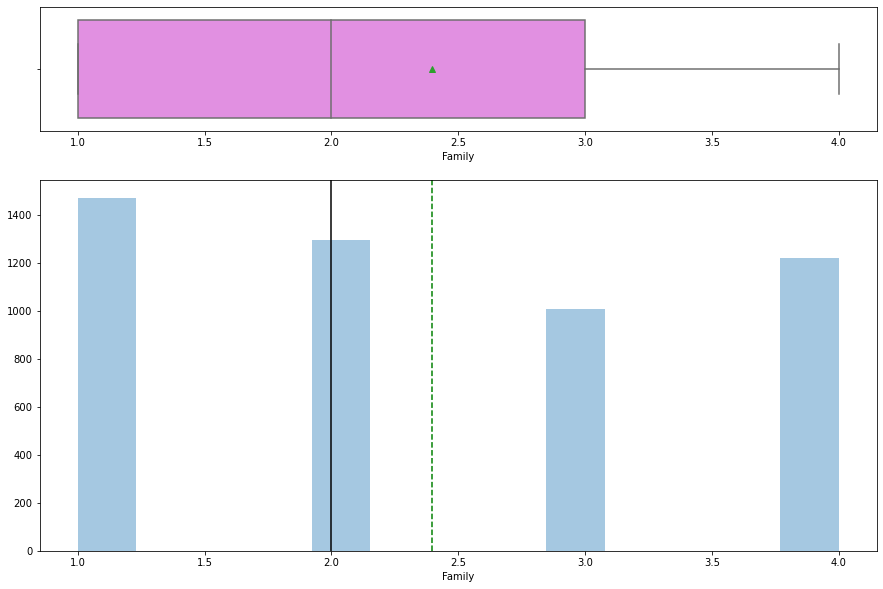

In [13]:
histogram_boxplot(data['Family'])

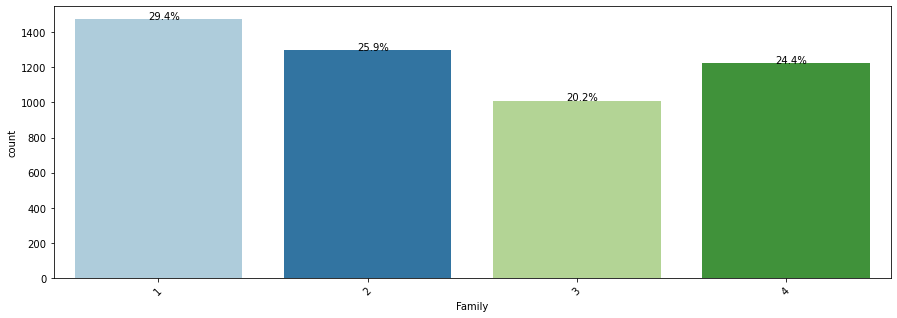

1472 people have family size of 1
1296 people have family size of 2
1010 people have family size of 3
1222 people have family size of 4


In [14]:
perc_on_bar(data, 'Family')
print(len(data[data['Family']==1]), 'people have family size of 1')
print(len(data[data['Family']==2]), 'people have family size of 2')
print(len(data[data['Family']==3]), 'people have family size of 3')
print(len(data[data['Family']==4]), 'people have family size of 4')

We see a very even distribution amongst the family size column. The majority of people at this bank are actually single which is interesting.

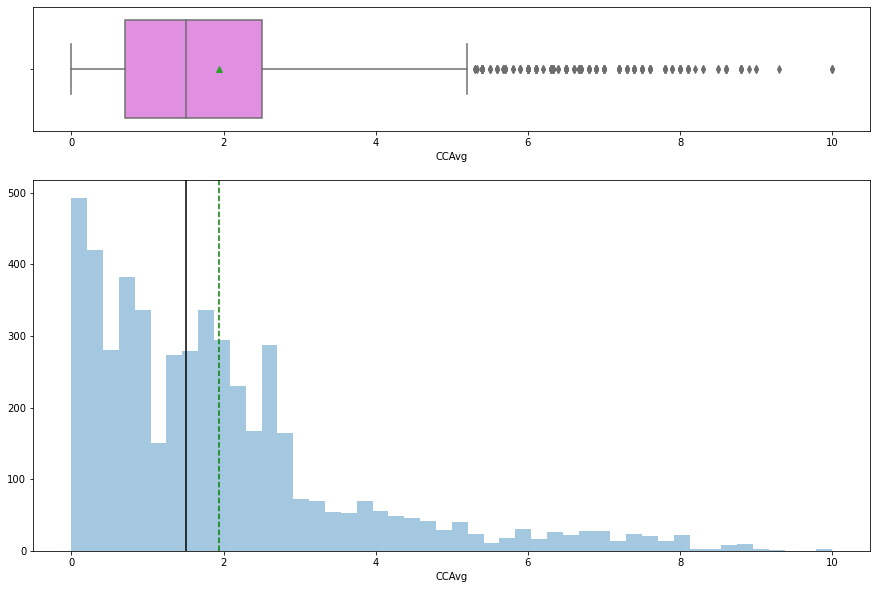

In [15]:
histogram_boxplot(data['CCAvg'])

* We can see that there are a decent number of outliers on the upper end in this column of data as well as a positive skew.
* a large portion of the banks customers aren't using credit cards are show up on the left end at 0.
* Most of the customers spend less than 3k a month on credit
* anyone spending more than 5k a month on credit appears as an outlier on the box and whisker plot


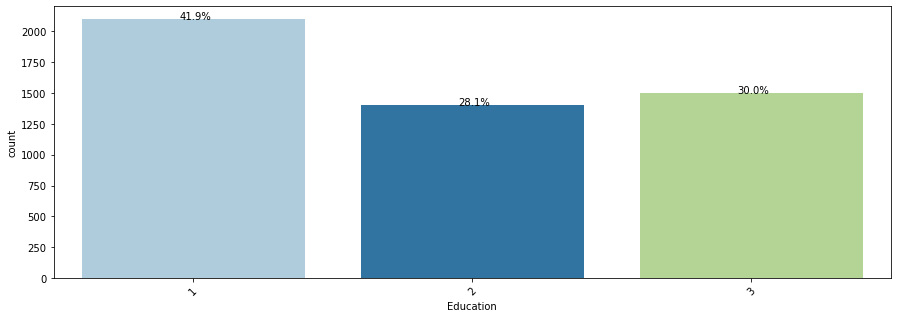

2096 people reported undergraduate education
1403 people reported graduate education
1501 people reported advanced/professional education


In [16]:
perc_on_bar(data, 'Education')
print(len(data[data['Education']==1]), 'people reported undergraduate education')
print(len(data[data['Education']==2]), 'people reported graduate education')
print(len(data[data['Education']==3]), 'people reported advanced/professional education')

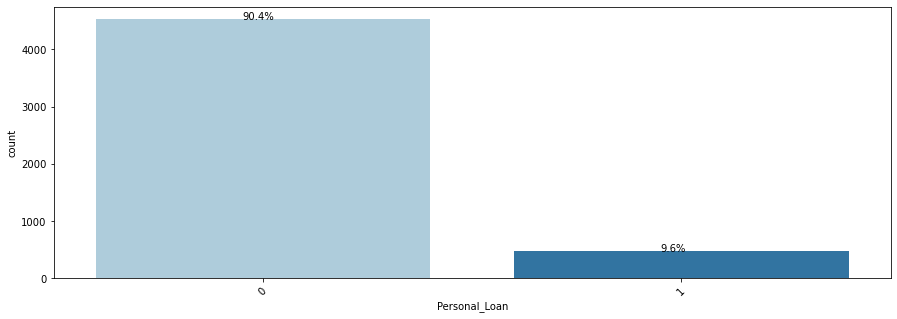

4520 people rejected the loan offer.
480 people bought the loan offer.


In [17]:
perc_on_bar(data, 'Personal_Loan')
print(len(data[data['Personal_Loan']==0]), 'people rejected the loan offer.')
print(len(data[data['Personal_Loan']==1]), 'people bought the loan offer.')

* This is the Target varaible
* So, we have a major skew in the target variable. We have about 10%/90% split. So from here we can already determine that we could not use accuracy alone to validate a model here. we will have to consider other metrics such as precision and recall. Before getting into that, let's complete EDA. 
* We also have to be careful when we split our data for modelling and make sure we maintain a similar split in training and test sets

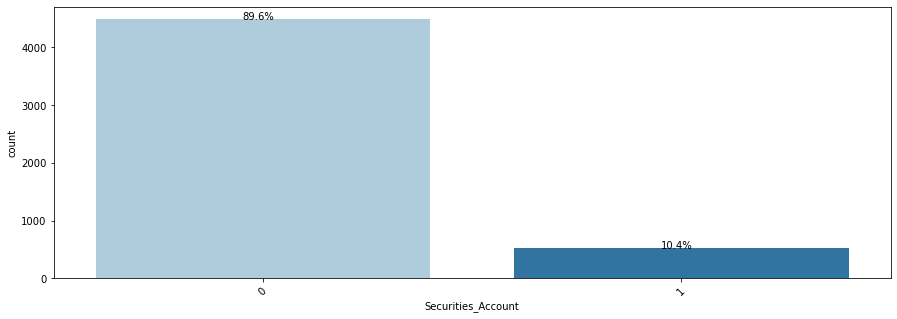

4478 people do not have a securities account with the bank
522 people have a securities account with the bank


In [18]:
perc_on_bar(data, 'Securities_Account')
print(len(data[data['Securities_Account']==0]), 'people do not have a securities account with the bank')
print(len(data[data['Securities_Account']==1]), 'people have a securities account with the bank')

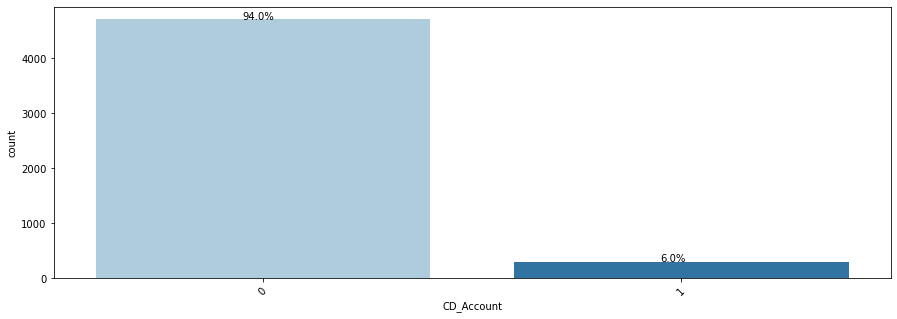

4698 people do not have a CD account with the bank
302 people have a securities account with the bank


In [19]:
perc_on_bar(data, 'CD_Account')
print(len(data[data['CD_Account']==0]), 'people do not have a CD account with the bank')
print(len(data[data['CD_Account']==1]), 'people have a securities account with the bank')

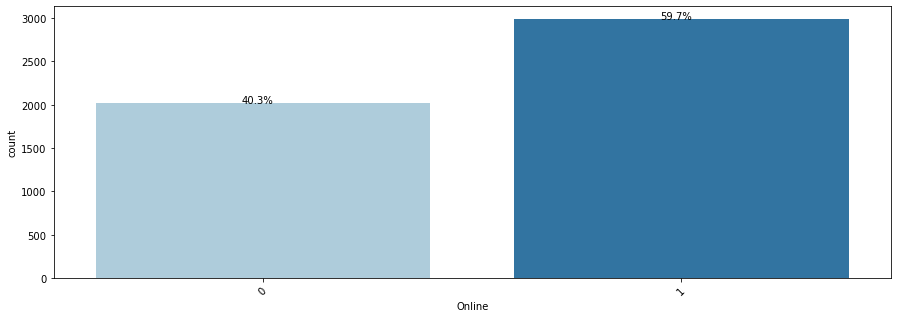

2016 people do not use online banking
2984 people use online banking


In [20]:
perc_on_bar(data, 'Online')
print(len(data[data['Online']==0]), 'people do not use online banking')
print(len(data[data['Online']==1]), 'people use online banking')

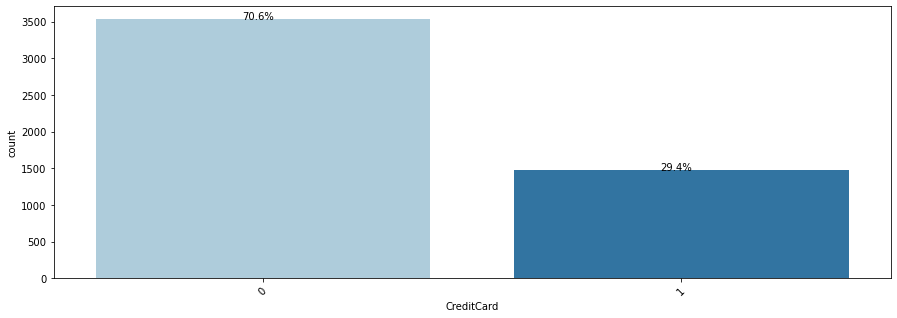

3530 people do not have a credit card with another bank
1470 people have a credit card with another bank


In [21]:
perc_on_bar(data, 'CreditCard')
print(len(data[data['CreditCard']==0]), 'people do not have a credit card with another bank')
print(len(data[data['CreditCard']==1]), 'people have a credit card with another bank')

This concludes the univariate analysis and we can now begin doing a bivariate analysis.

## Bivariate Analysis

In [22]:
data.corr()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.001232,-0.002616,0.002422,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


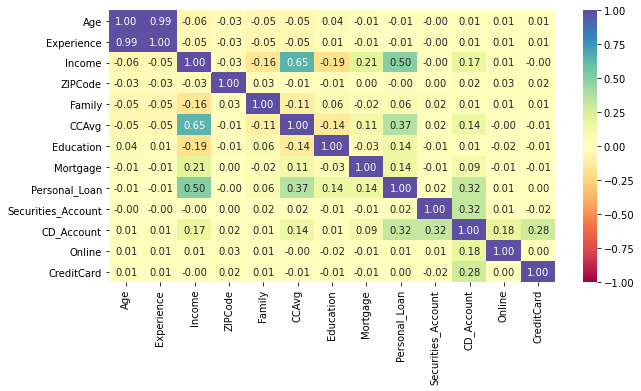

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

Here we can see that Age and Experience are highly correlated. Also, earlier I noticed negative values for some rows in the experience column which is probably an error. Because of the high correlation we can simply drop the Experience column. So, I will do that now.

In [24]:
data.drop(['Experience'], axis=1, inplace=True)

In [25]:
data.head()

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


Now we can run a pairplot and get an overall view of how our variables interact with eachother

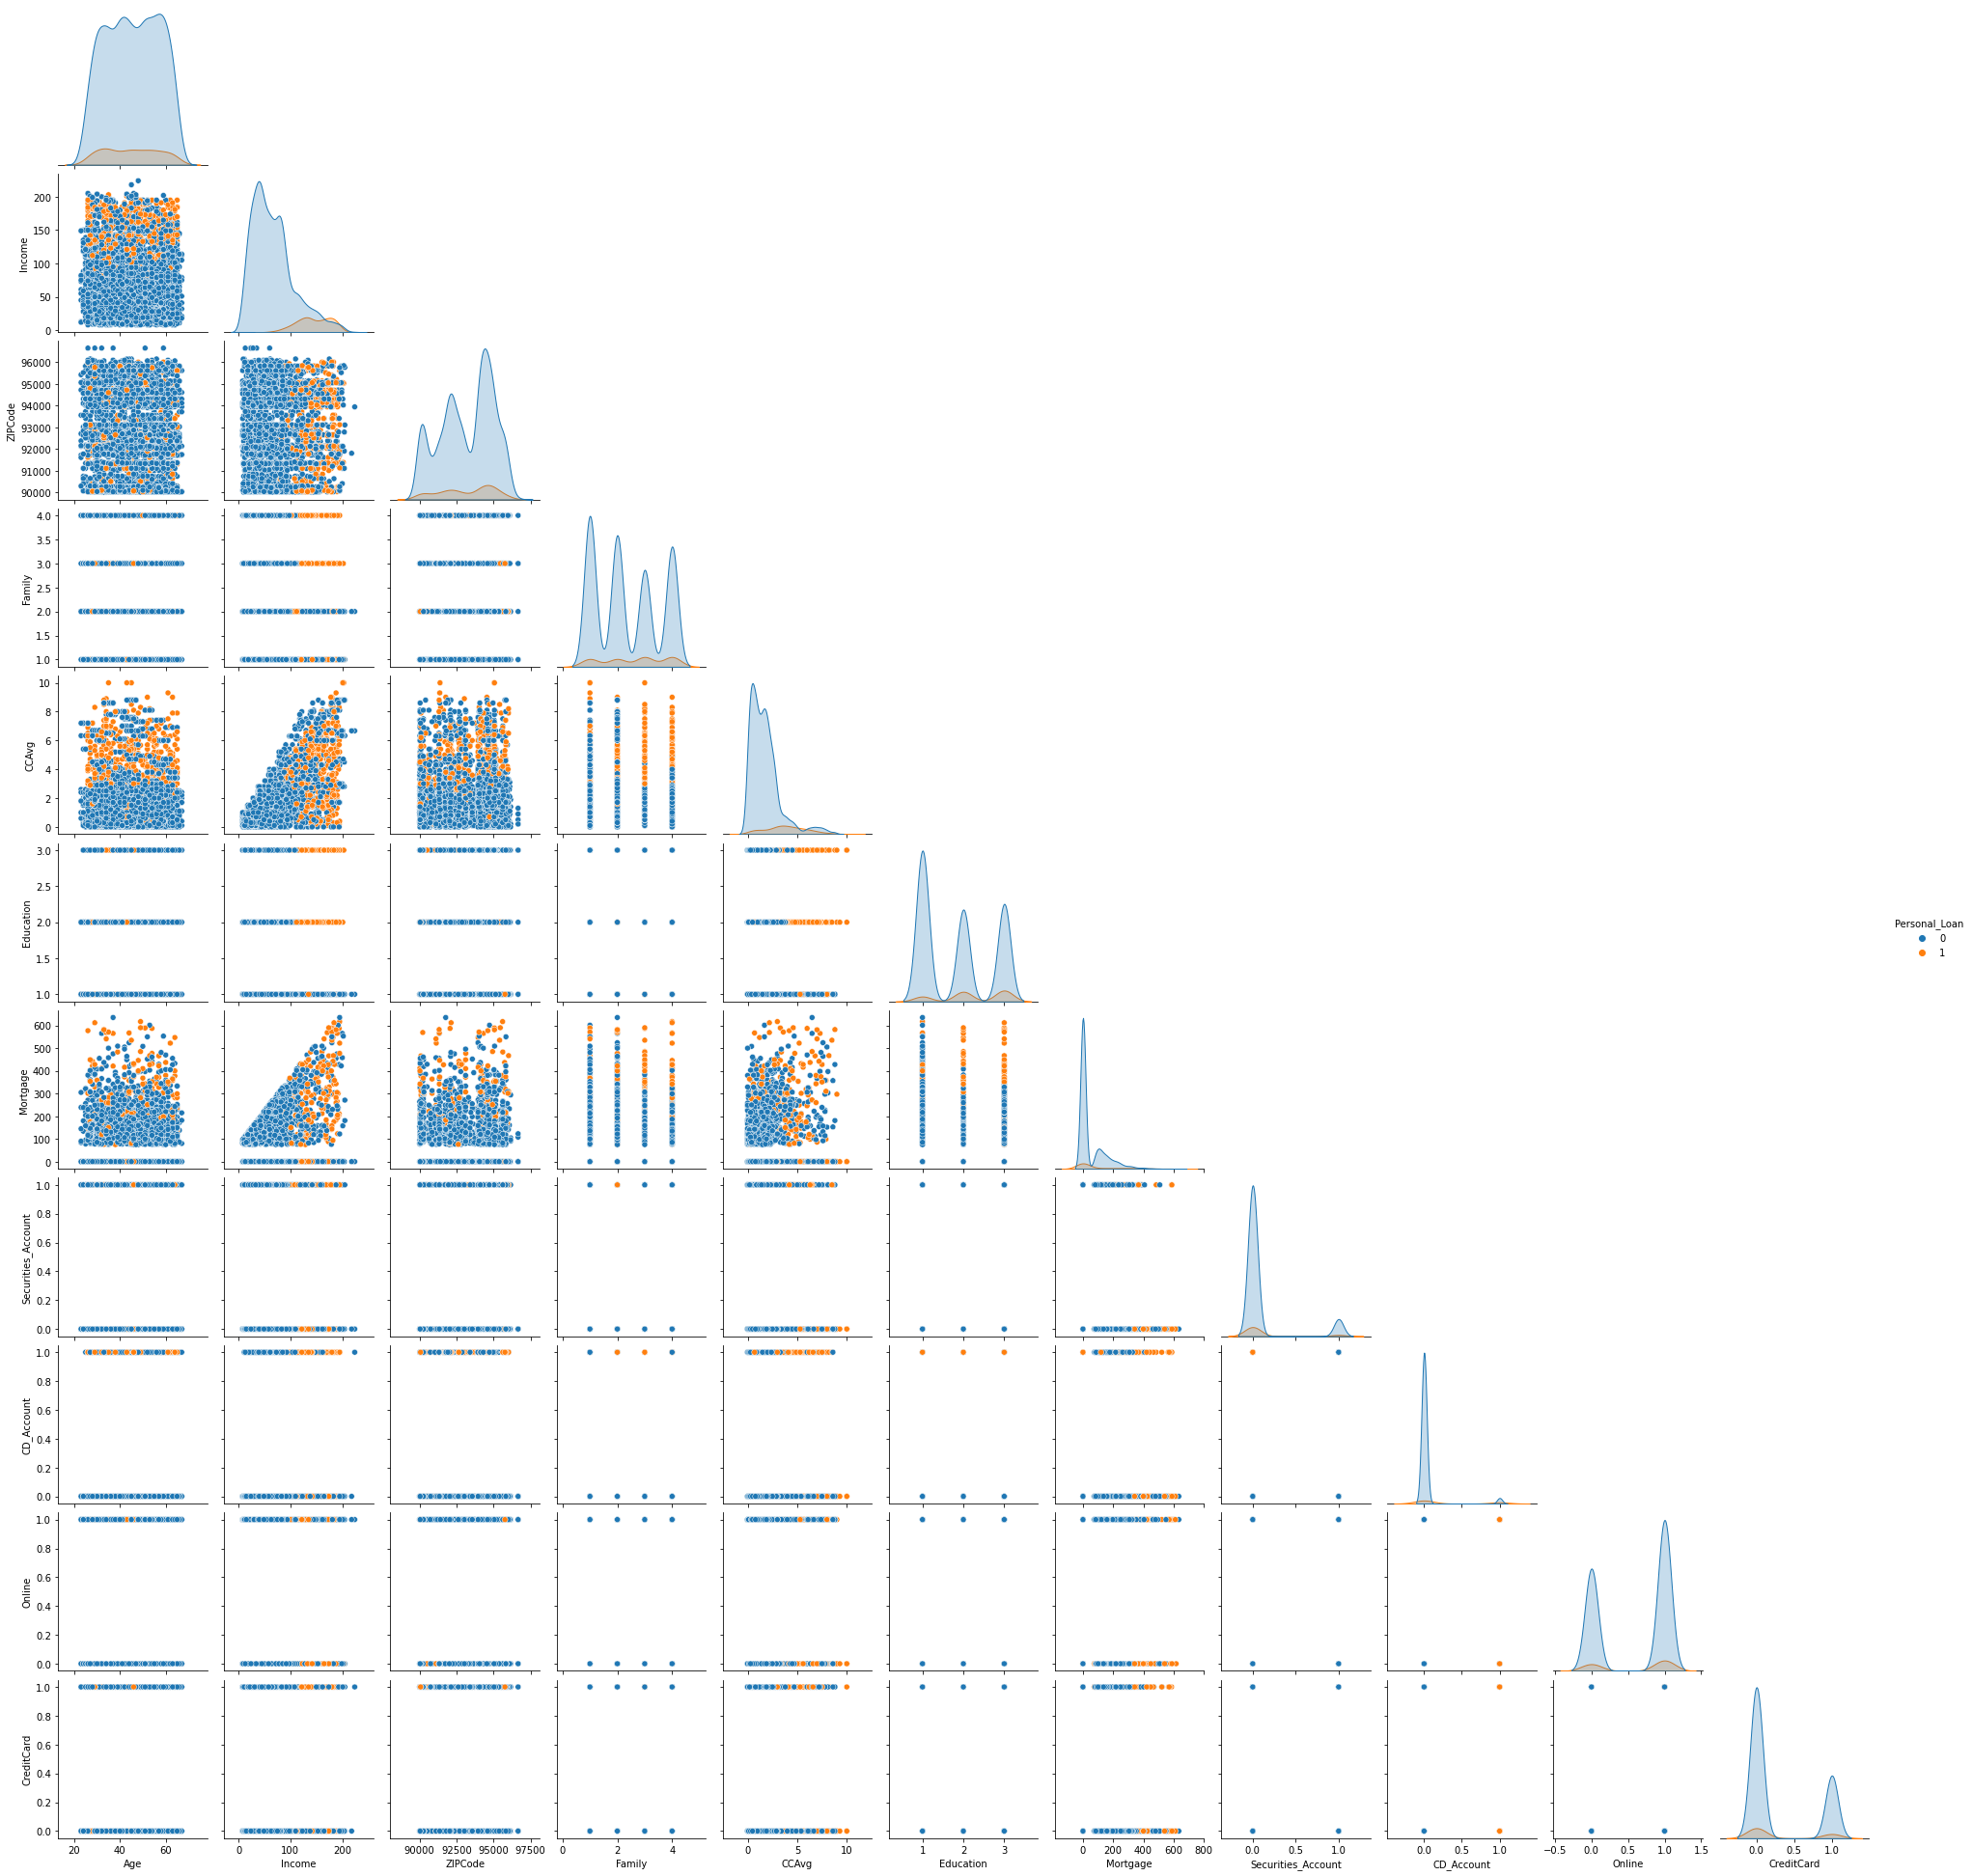

In [26]:
sns.pairplot(data, hue='Personal_Loan',corner=True)

Let's explore how each feature interacts with our target variable (personal_Loan) more closely.

<AxesSubplot:xlabel='Education', ylabel='Income'>

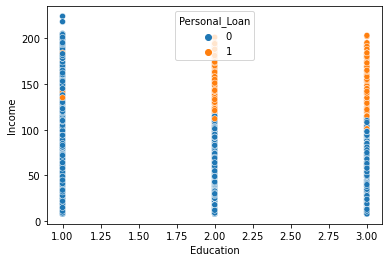

In [27]:
sns.scatterplot(x=data['Education'], y=data['Income'],hue=data['Personal_Loan'])

Here we can see that people with more education and income tend to opt for the personal loan offer.

In green: Did not previously buy personal loan
In red: Did previously buy personal loan


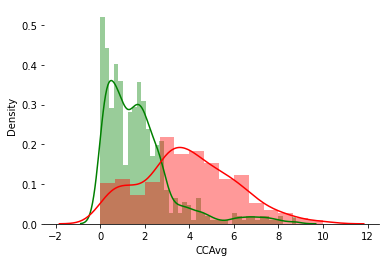

In [28]:
sns.distplot( data[data['Personal_Loan'] == 0]['CCAvg'], color = 'g')
sns.distplot( data[data['Personal_Loan'] == 1]['CCAvg'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph
print('In green: Did not previously buy personal loan')
print('In red: Did previously buy personal loan')

As CCAvg increases, we see that people are more likely to buy a personal loan.

In green: Did not previously buy personal loan
In red: Did previously buy personal loan


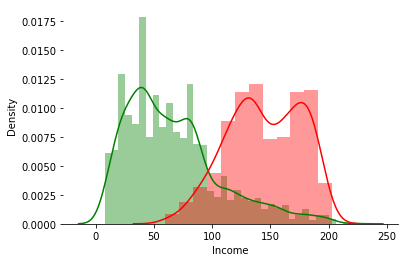

In [29]:
sns.distplot( data[data['Personal_Loan'] == 0]['Income'], color = 'g')
sns.distplot( data[data['Personal_Loan'] == 1]['Income'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph
print('In green: Did not previously buy personal loan')
print('In red: Did previously buy personal loan')

As Income increases, we see that people are more likely to buy a personal loan.

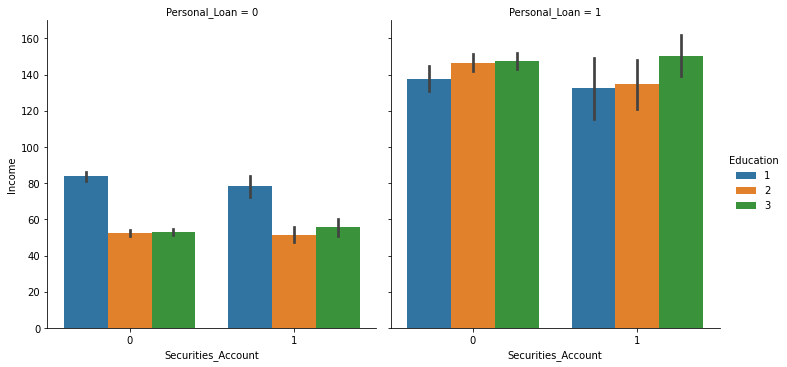

In [30]:
sns.catplot(y='Income',x='Securities_Account',hue='Education',kind='bar',col="Personal_Loan", data=data)

People with a securities account bought a loan more often in the past.

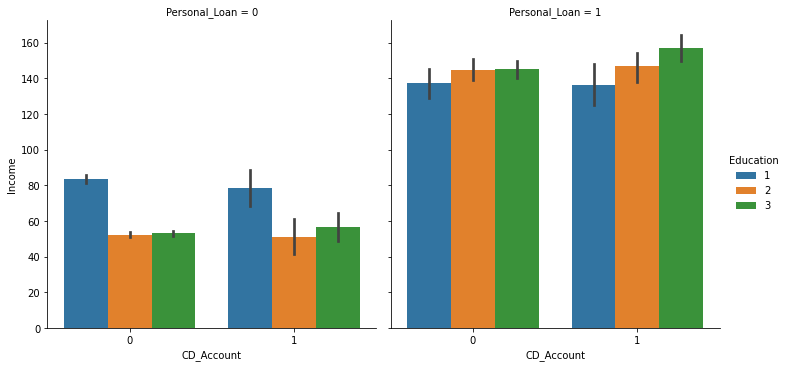

In [31]:
sns.catplot(y='Income',x='CD_Account',hue='Education',kind='bar',col="Personal_Loan", data=data)

People with a CD account bought a loan more often in the past.

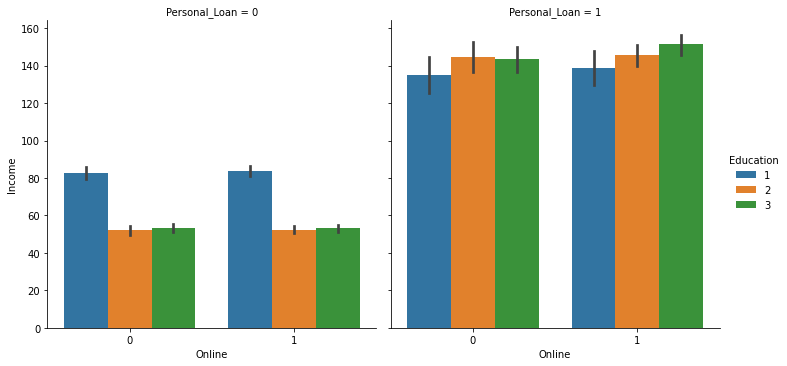

In [32]:
sns.catplot(y='Income',x='Online',hue='Education',kind='bar',col="Personal_Loan", data=data)

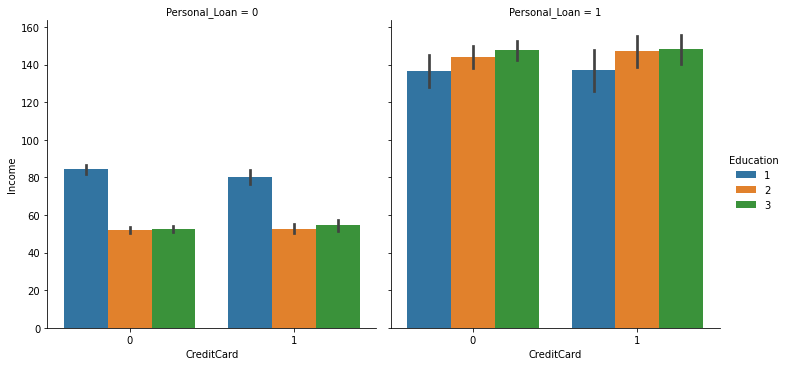

In [33]:
sns.catplot(y='Income',x='CreditCard',hue='Education',kind='bar',col="Personal_Loan", data=data)

People with higher income previously bought a personal loan.

In [34]:
## Function to plot stacked bar chart
def stacked_plot(x):
    tab1 = pd.crosstab(x,data['Personal_Loan'],margins=True)
    tab = pd.crosstab(x,data['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

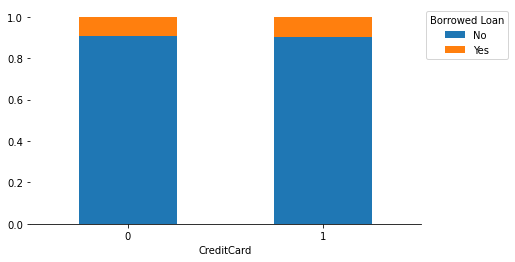

In [35]:
stacked_plot(data['CreditCard'])

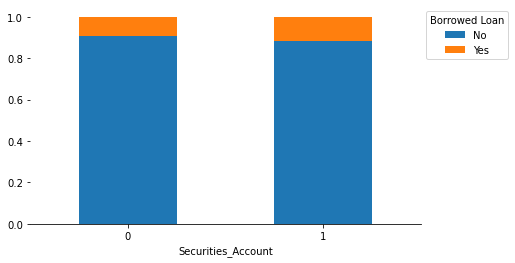

In [36]:
stacked_plot(data['Securities_Account'])

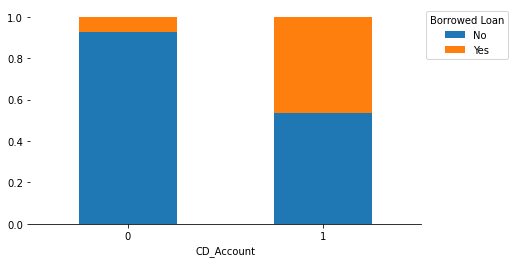

In [37]:
stacked_plot(data['CD_Account'])

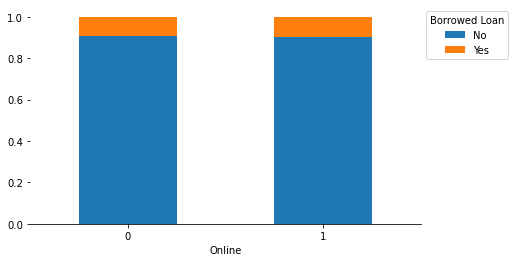

In [38]:
stacked_plot(data['Online'])

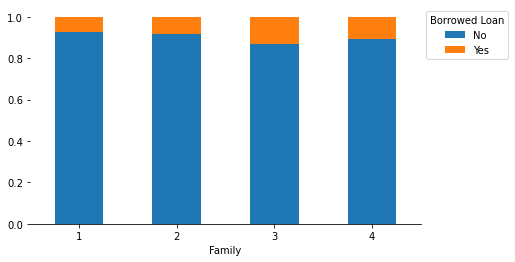

In [39]:
stacked_plot(data['Family'])

People with a CD_Account or a larger family are more likely to buy a loan. 
Whether the person uses online banking, has a securities account or has creditcards with another bank does not seem to influence the buying of a loan.

<AxesSubplot:xlabel='Income', ylabel='Mortgage'>

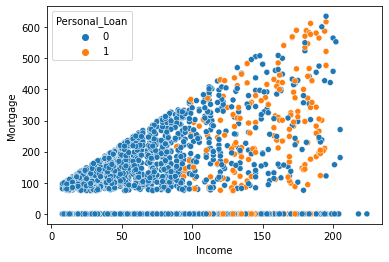

In [40]:
sns.scatterplot(x=data['Income'], y=data['Mortgage'],hue=data['Personal_Loan'])

People with larger mortgages tend to buy a personal loan.

### Creating training and test sets

In [41]:
X=data.drop(['Personal_Loan'], axis=1)
Y = data['Personal_Loan']
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 42)

In [42]:
print('Shape of Training set : ',X_train.shape )
print('Shape of test set : ',X_test.shape )
print('Percentage of classes in training set:\n',y_train.value_counts(normalize=True))
print('Percentage of classes in test set:\n',y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 11)
Shape of test set :  (1500, 11)
Percentage of classes in training set:
 0    0.907714
1    0.092286
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
 0    0.895333
1    0.104667
Name: Personal_Loan, dtype: float64


# Preproccessing
* Missing Value Treatment - There were no missing values
* Outlier Detection - Some outliers detected but not enough to justify altering the data to cap them or adjust the values in any other way
* Feature Engineering - No features will be engineered for this project. The goal of this project is to compare the decision tree classifier against the logistic regression algorithm performance for this problem type.

Possible feature engineering could include:
1. binning age into age groups.
2. binning mortgage and income into Low, Medium, and High
* SCALING: For the logistic regression algorithm to give it all its got, the variance in the data matters, so I will create a copy of training and testing data that I will scale. I can not justify using the scaled versions on the Tree based algorithms as it should not have any affect. Tree based models are not sensitive to variance. However, for a fair comparison I believe the Logistic Regression should be fed scaled features.

### Using standardscaler to create scaled sets of training and testing data    

In [43]:
X_train.head()

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
1840,55,23,93106,4,0.4,3,88,0,0,0,0
2115,57,30,95070,3,1.4,1,0,0,0,0,0
4437,63,63,92507,2,1.5,1,0,0,0,1,0
1146,31,71,90034,1,0.1,1,78,1,0,0,0
2486,61,130,92717,1,1.3,1,257,0,0,0,0


In [44]:
scaler=StandardScaler() #initializing the scaler

#fitting the scaler to train and test sets
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled=pd.DataFrame(scaler.fit_transform(X_test))
#reverting the scaled set's columns names back to the original
X_train_scaled.columns=X_train.columns
X_test_scaled.columns=X_test.columns
X_train_scaled.head(10) #verify changes


,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,0.863721,-1.106854,-0.041884,1.406319,-0.877185,1.332808,0.295858,-0.339647,-0.253285,-1.218932,-0.651538
1,1.037984,-0.953684,1.066561,0.535610,-0.305492,-1.054514,-0.554379,-0.339647,-0.253285,-1.218932,-0.651538
2,1.560773,-0.231599,-0.379948,-0.335099,-0.248322,-1.054514,-0.554379,-0.339647,-0.253285,0.820390,-0.651538
3,-1.227433,-0.056548,-1.775663,-1.205808,-1.048693,-1.054514,0.199240,2.944233,-0.253285,-1.218932,-0.651538
4,1.386510,1.234454,-0.261428,-1.205808,-0.362661,-1.054514,1.928699,-0.339647,-0.253285,-1.218932,-0.651538
5,0.079539,0.665538,0.499358,-1.205808,2.152790,-1.054514,-0.554379,-0.339647,-0.253285,0.820390,1.534831
6,-1.140302,-0.625464,0.777598,-1.205808,0.266202,0.139147,-0.554379,-0.339647,-0.253285,-1.218932,-0.651538
7,-0.791776,0.140385,0.805817,1.406319,0.151863,0.139147,-0.554379,-0.339647,-0.253285,0.820390,-0.651538
8,1.125116,1.234454,0.869027,-0.335099,0.437710,-1.054514,-0.554379,-0.339647,-0.253285,0.820390,-0.651538
9,0.776590,-0.866159,0.070428,1.406319,-1.048693,1.332808,-0.554379,-0.339647,-0.253285,0.820390,-0.651538


## Model evaluation criterion

## Model can make wrong predictions as:

1. Predicting a person will buy the loan when they actually will not
2. Predicting a person will not buy the loan when they actually would

## Which case is more important?

* in case number 1, resources are wasted sending a loan offer to the customer
* in case number 2, revenue is lost from interest on loans because you did not make the offer to someone who would have bought it

*Therefore:

case number 2 is much more important because the idea is to offer the loan to the most people that would accept it, this is how we increase our conversion rate.

*Therefore: we want our model to reduce errors of type False Negatives and our metric to maximize would be recall= TP/(TP+FN) so that we can target the most people that would most likely consider purchasing a loan.


### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_metrics_score function will be used to check the model performance of models.
* The make_confusion_matrix function will be used to plot confusion matrix.

In [45]:
def get_metrics_score(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict_proba(train)[:,1]>threshold)
    pred_test = (model.predict_proba(test)[:,1]>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        pred_train_prob = model.predict_proba(train)[:,1]
        pred_test_prob = model.predict_proba(test)[:,1]
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [46]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Bought Loan (1)","Actual - Did not buy Loan (0)"]],
                  columns = [i for i in ['Predicted - Bought Loan (1)','Predicted - Did not buy loan (0)']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Logisitic Regression

Model 1: Baseline Model
 
Accuracy on training set :  0.952
Accuracy on test set :  0.9526666666666667
Recall on training set :  0.6068111455108359
Recall on test set :  0.6305732484076433
Precision on training set :  0.8270042194092827
Precision on test set :  0.8839285714285714
F1 on training set :  0.7000000000000001
F1 on test set :  0.7360594795539034


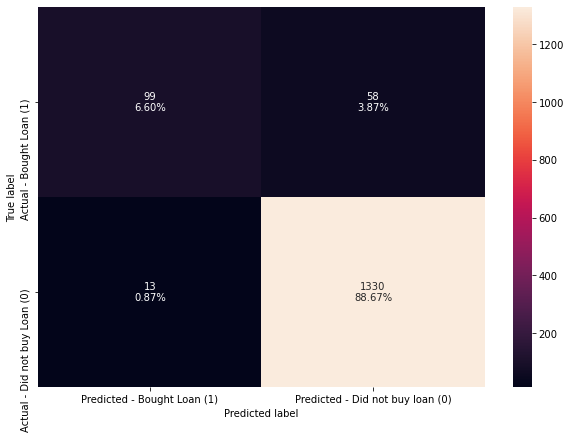

In [47]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver='newton-cg',random_state=1)
model  = lg.fit(X_train_scaled,y_train)

# checking model performances for this model
print('Model 1: Baseline Model')
print(' ')
scores_LR = get_metrics_score(model,X_train_scaled,X_test_scaled,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lg,X_test_scaled,y_test)

We can see that the model is generalizing really well by looking at the metrics. The model is actually performing better on testing data than on training data which is not often the case but a very good thing to see.

* We can see that the model is misclassifying 58 people in the top right. These people would have bought the loan but the model thinks they wouldn't have. This is bad and we want to reduce this error as it would cost the bank loan revenue to miss out on these opportunities. Reducing this error would improve our Recall Metric, and will cost us some of the precision metric. The precision metric is not as important though, as it signifies a loan offer that was sent out but not actually bought. Assuming it costs much less to send out an unaccepted offer than the opportunity cost to not send out an offer that would have been accepted, the trade off of precision for recall on this model is justifiable, and that is exactly what we will do by altering the classification threshold boundary.

* ROC-AUC on training set

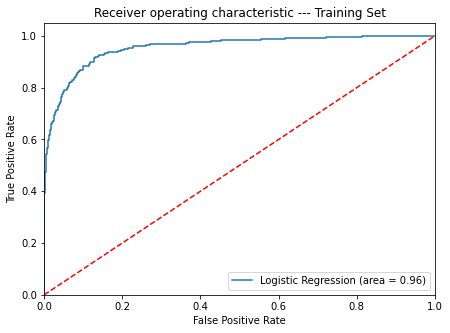

In [48]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train_scaled)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic --- Training Set')
plt.legend(loc="lower right")
plt.show()

The AUC is 0.96 in training which is very strong.

* ROC-AUC on testing set

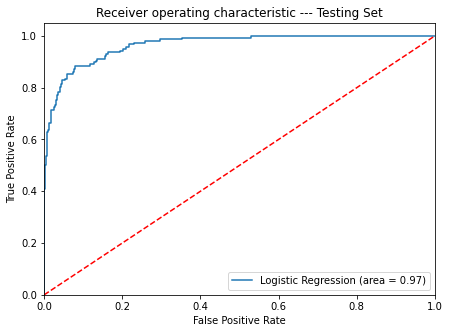

In [49]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic --- Testing Set')
plt.legend(loc="lower right")
plt.show()

The AUC in testing is 0.97 which is very strong. And also consistent with this model performing better in testing than in training.

## Finding the coefficients

In [50]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
coef,0.141474,2.352451,-0.120138,0.786534,0.214106,1.323792,0.065448,-0.292911,0.866178,-0.265641,-0.524508


## Interpretations:

* coefficient of ZIPCode, Securities_Account, Online, and CreditCard are negative. Therefore an increase in these will lead to a decrease in chances of the person buying the personal loan
* coefficient of Age, Income, Family, CCAvg, Education, Mortgage, and CD_Account are positive. Therefore, an increase in these will lead to an increase in chances of the person buying the personal loan

## Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, odds = exp(b)
* The percentage change in odds is given as odds = (exp(b) - 1) * 100

Getting the odds from coefficients:

In [51]:
odds = np.exp(lg.coef_[0]) # converting coefficients to odds
pd.DataFrame(odds, X_train.columns, columns=['odds']).T # adding the odds to a dataframe

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
odds,1.15197,10.5113,0.886798,2.195773,1.238753,3.757642,1.067637,0.746089,2.377806,0.766714,0.591847


Percentage change in odds:

In [52]:
perc_change_odds = (np.exp(lg.coef_[0])-1)*100 # finding the percentage change
pd.DataFrame(perc_change_odds, X_train.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
change_odds%,15.197034,951.130029,-11.320171,119.577303,23.875336,275.764239,6.763698,-25.391133,137.780626,-23.328585,-40.815327


## Coefficient interpretations:

* Age: Holding all other features constant, a 1 unit increase in age will decrease the odds of a person having bought a personal loan by 1.15 times or 15.2%.

* Income: Holding all other features constant, a 1 unit increase in Income will increase the odds of a person having bought a personal loan by 10.5 times or 951%.

* Securities_Account: Holding all other features constant, a 1 unit increase in Securities_Account will decrease the odds of a person having bought a personal loan by 0.75 or 25%

* Other coefficient interpretations can be done similarly.


* According to the Logistic Regression Model the Top 5 features are:
1. Income
2. Education
3. CD_Account
4. Family
5. CCAvg

## Model Performance Improvement

* Let's change the model threshold to the optimal value determined from AUC-ROC curve and try to improve the Recall score on our model. The optimal value will be determined when the True Positive classification Rate is high and the False Positive classification rate is low.

In [53]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test_scaled)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.14599830775815228


In [54]:
print('Model 2: Using the AUC-ROC curve to determine the optimal threshold in an attempt to improve the baseline model')
print(' ')
scores_LR = get_metrics_score(lg,X_train_scaled,X_test_scaled,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

Model 2: Using the AUC-ROC curve to determine the optimal threshold in an attempt to improve the baseline model
 
Accuracy on training set :  0.9142857142857143
Accuracy on test set :  0.916
Recall on training set :  0.8390092879256966
Recall on test set :  0.8789808917197452
Precision on training set :  0.5221579961464354
Precision on test set :  0.563265306122449
F1 on training set :  0.6437054631828979
F1 on test set :  0.6865671641791045
ROC-AUC Score on training set :  0.8804741120144692
ROC-AUC Score on test set :  0.8996542582202598


* Here, our recall tells us that out of all people who would buy the loan, 87.8% were correctly predicted in testing. This is an increase of about 25% from the baseline model, where the threshold was at >=0.5.
* By reducing the threshold to >=0.145 we were able to aid the model in correctly classifying about half of the people the baseline model was unable to correctly classify. 
* Assuming that sending a personal loan offer to someone who might reject it doesn't cost the bank very much money or resources, it would be worth it to change the threshold. What changing the threshold means for the bank is that the model is primarily doing one major thing for them. The model is telling the bank who will not buy the personal loan with about 85% accuracy. This allows the bank to not waste resources on those people. What the model does is say "hey, this list of people contains 84.7% of the people in your client base that will buy your loan"

# Decision Tree Classifier

Let's make a pure rooted tree to get a baseline performance metric for this model on this problem.

Model 1: Baseline Model
 
Accuracy on training set :  1.0
Accuracy on test set :  0.9786666666666667
Recall on training set :  1.0
Recall on test set :  0.9171974522292994
Precision on training set :  1.0
Precision on test set :  0.8834355828220859
F1 on training set :  1.0
F1 on test set :  0.9


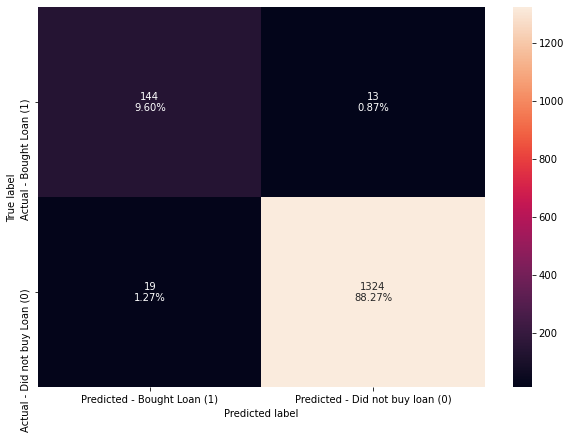

In [55]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
# scaling is not required for a tree based model.
# checking model performances for this model
print('Model 1: Baseline Model')
print(' ')
scores_DT = get_metrics_score(dTree,X_train,X_test,y_train,y_test)
make_confusion_matrix(dTree,X_test,y_test)

As expected, running a decision tree without giving it a stopping point resulted in perfect accuracy on training, this means that the decision tree is way too complex and subdivides the feature set into groups of 1 (is pure rooted). This is generally not ideal, however here for testing we are still getting comparable values and higher accuracy, recall, and precision on the test set than we did with logistic regression.

I will remake the model with prepruning selection for hyperparemeters via gridsearch with cross validation to see how it affects the decision tree performance and if we can reduce the size of the tree without penalizing performance. 

But first lets view the baseline tree:

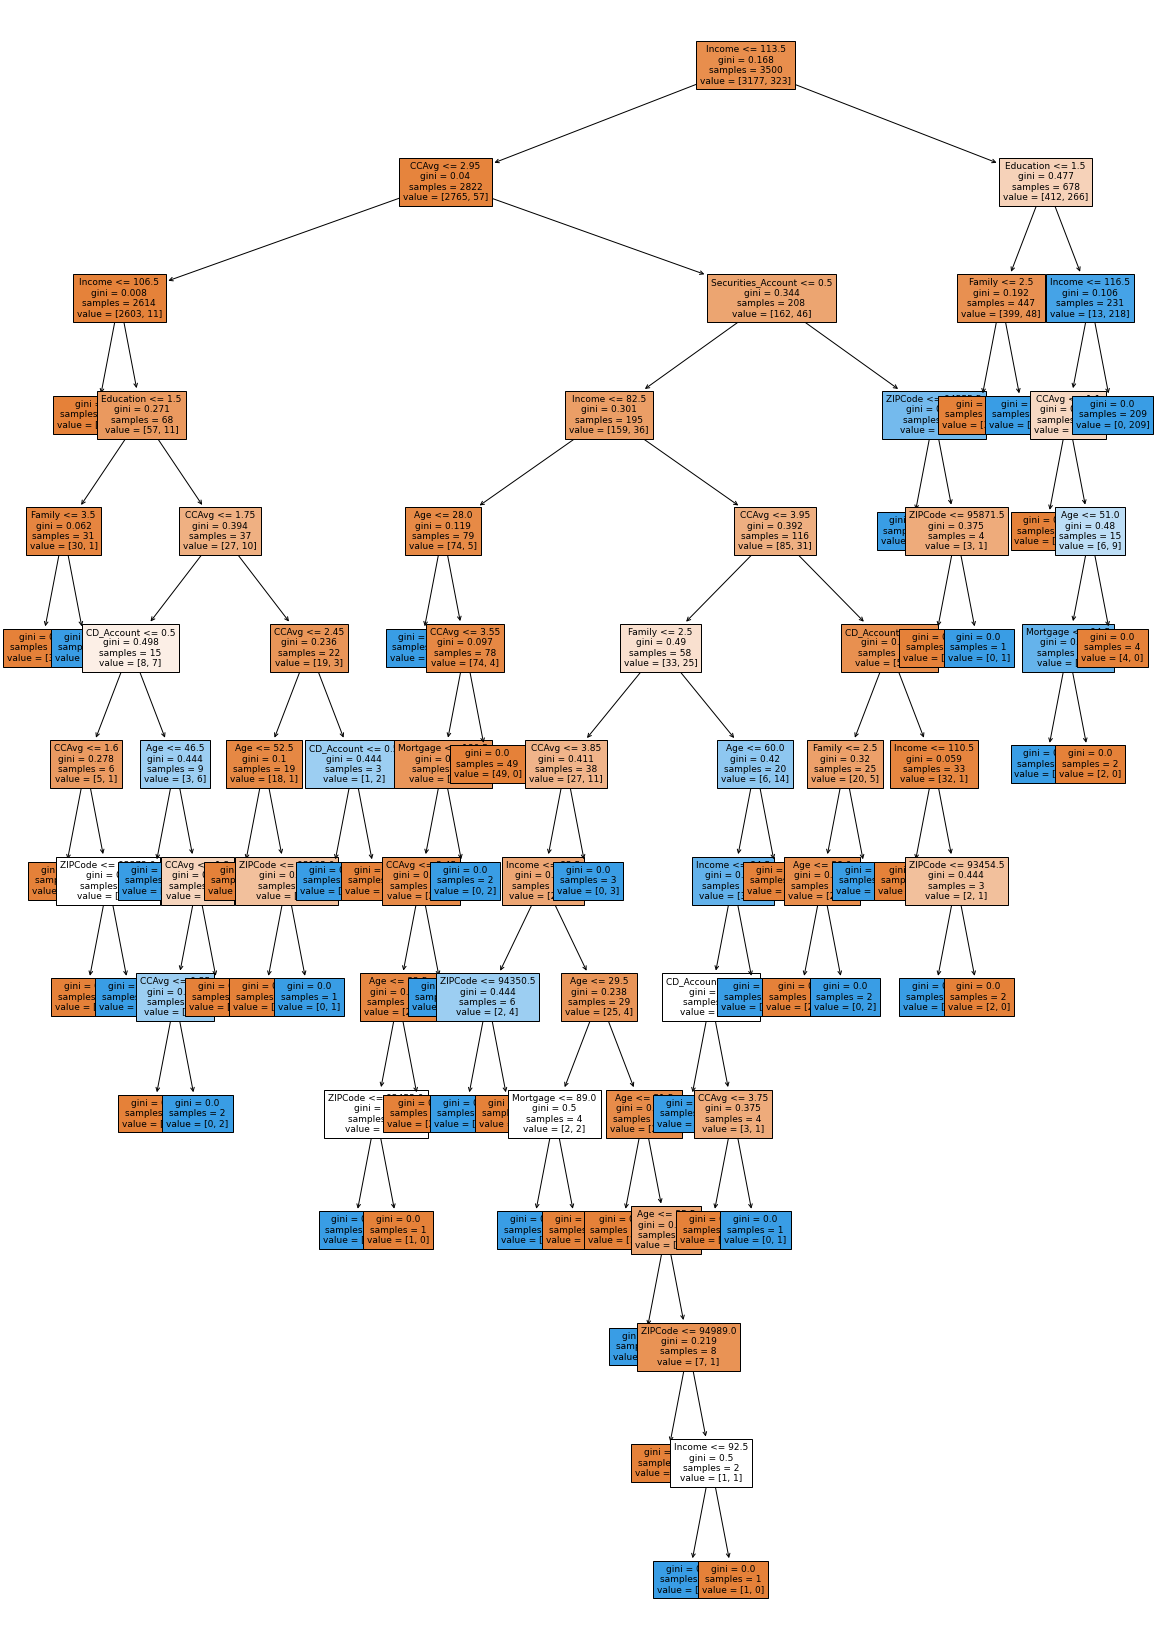

In [56]:
feature_names=list(data.columns)
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

And the Feature importances:

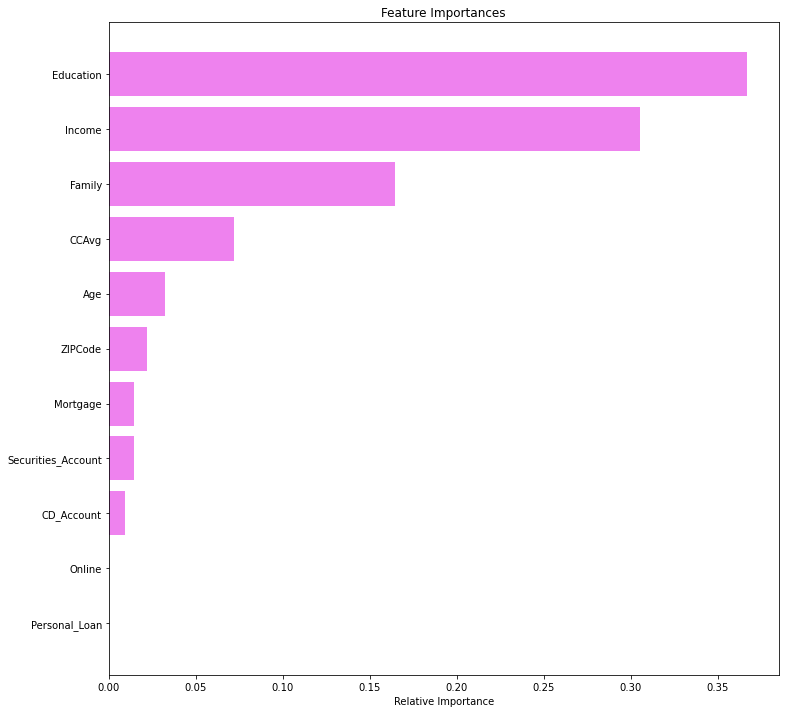

In [57]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Compare to earlier results for logistic regression:
1. Income
2. Education
3. CD_Account
4. Family
5. CCAvg

WOW! CDAccount was ranked number 5 but now it is deemed much less important by the pure-rooted tree. Let's reduce the tree's complexity and see how it affects its ability to generalize.

### Using GridSearch for Hyperparameter tuning of our tree model
* Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [58]:
estimator = DecisionTreeClassifier(random_state=1) #use gridsearch on decision tree
parameters = {# Create a dictionary of parameters to test
    "max_depth": np.arange(1, 12),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001,0.001],
    "max_features": ["log2", "sqrt"],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score) #I want to optimize recall

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_ 

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

The main hyperparameter I am concerned about here is the max_depth parameter. The best estimator was chosen at 11 max depth, which is within (and not the boundary) of the range we put into the gridsearch. This gives me confidence that we used a sufficient grid during the search.

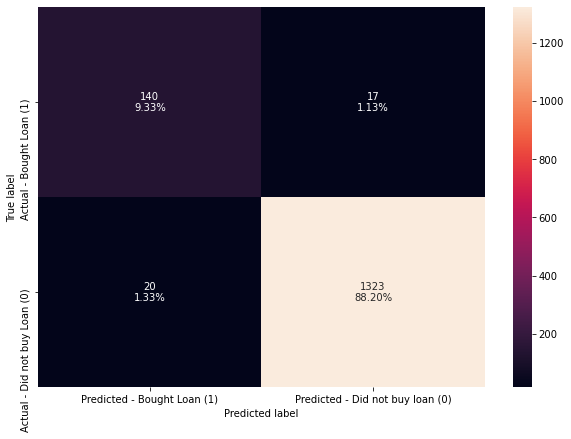

In [59]:
make_confusion_matrix(estimator,X_test, y_test)

In [60]:
scores_DT2 = get_metrics_score(estimator,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.9974285714285714
Accuracy on test set :  0.9753333333333334
Recall on training set :  0.9721362229102167
Recall on test set :  0.89171974522293
Precision on training set :  1.0
Precision on test set :  0.875
F1 on training set :  0.9858712715855572
F1 on test set :  0.8832807570977919


The prepruned tree is still doing a very good job and is much less complex. What I think is great about the decision tree model is that for this problem, there doesn't seem to be much of a tradeoff between precision and recall. Both metrics actually indicate very good performance. This is indicated by the strong F1 score on testing at 88%. Let's visualize the tree just to see how much simpler it is.

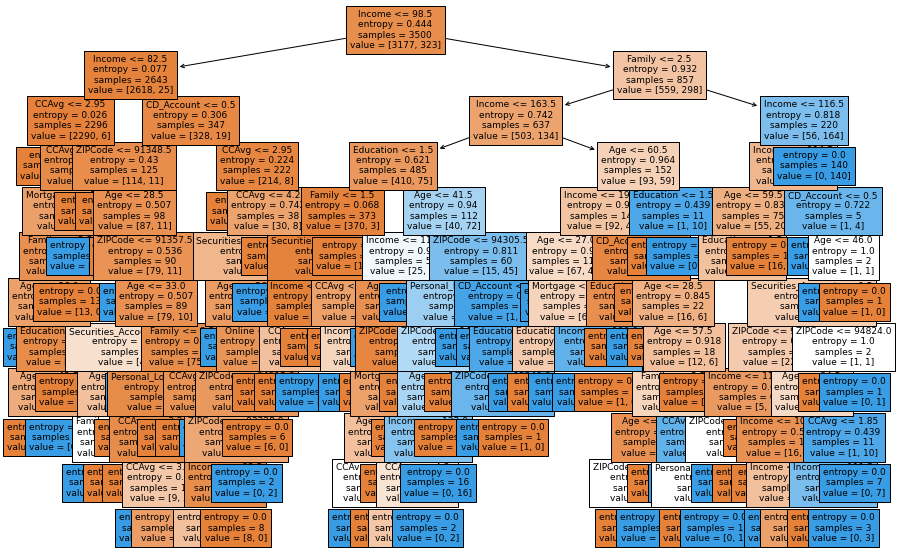

In [61]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [62]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                         Imp
Income              0.535452
Education           0.185889
Family              0.106087
CCAvg               0.067646
Age                 0.055456
ZIPCode             0.021874
CD_Account          0.010500
Mortgage            0.008366
Online              0.004347
Securities_Account  0.003933
CreditCard          0.000449


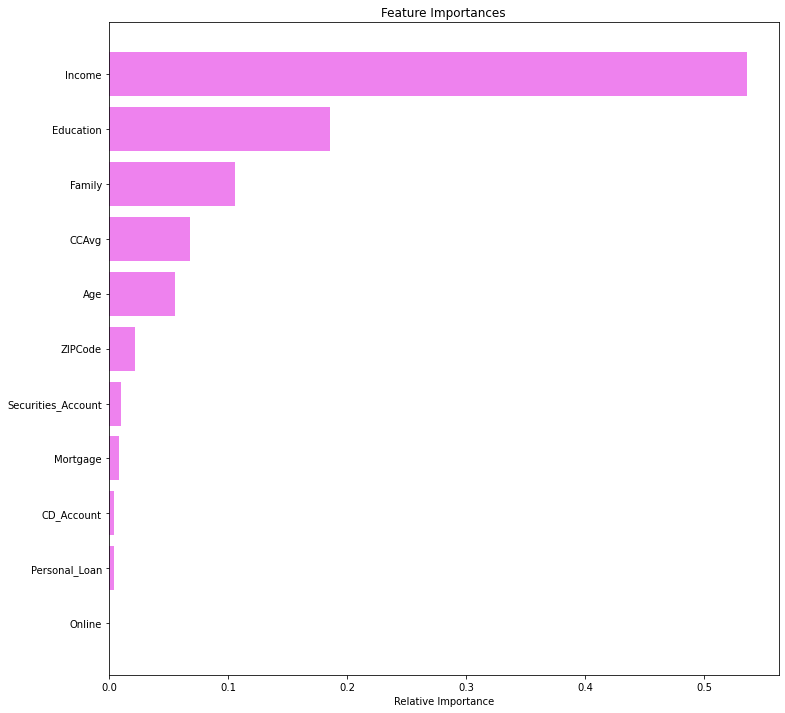

In [63]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

We can see that the pruned tree is giving much more gini importance to the Securities_Account feature than the pure rooted tree.

Compare to earlier results for logistic regression:
1. Income
2. Education
3. CD_Account
4. Family
5. CCAvg

CD_Account is even less important to the pruned tree model.

Let's try to further improve the tree using post pruning. This will be done based on cost complexity ccp_alpha. 

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [64]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [65]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-4.358538e-15
1,7.538460e-19,-4.357784e-15
2,7.538460e-19,-4.357030e-15
3,7.538460e-19,-4.356277e-15
4,1.507692e-18,-4.354769e-15
5,1.773755e-18,-4.352995e-15
6,3.525339e-18,-4.349470e-15
7,3.591855e-18,-4.345878e-15
8,3.724886e-18,-4.342153e-15
9,1.055384e-17,-4.331599e-15


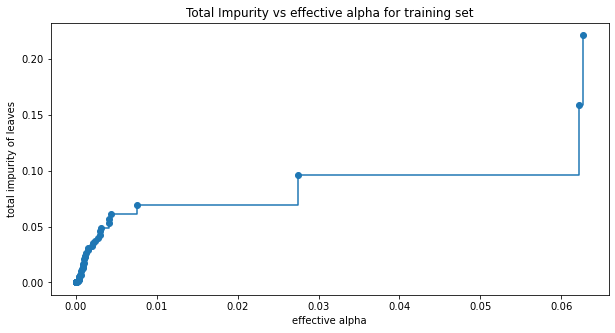

In [66]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Now, we can train a decision tree using the effective alphas

In [67]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.24241283774501482


This alpha value would prune the whole tree. therefore we will index it out

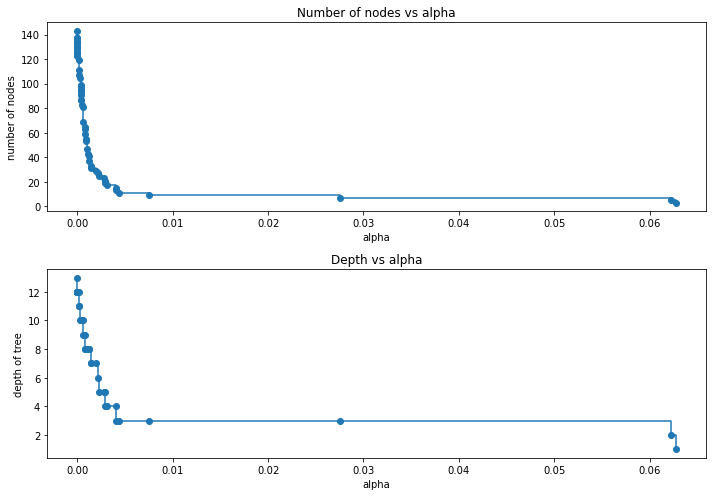

In [68]:
clfs = clfs[:-1] #indexing out the last tree which only contains 1 node
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [69]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

In [70]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

In [71]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

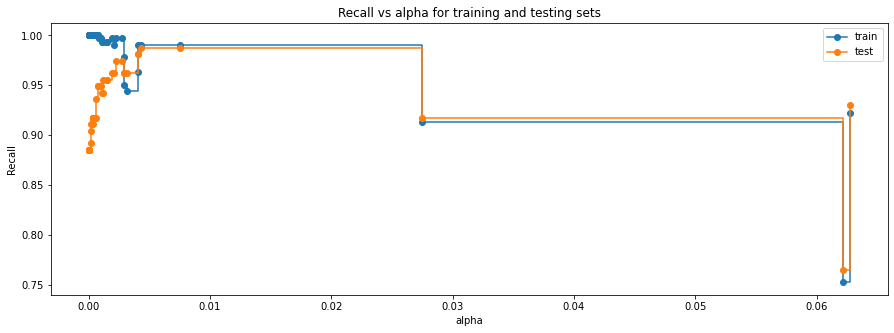

In [72]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Let's train the model where we get the highest recall in training and testing

In [73]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]

best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004349433696418357,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

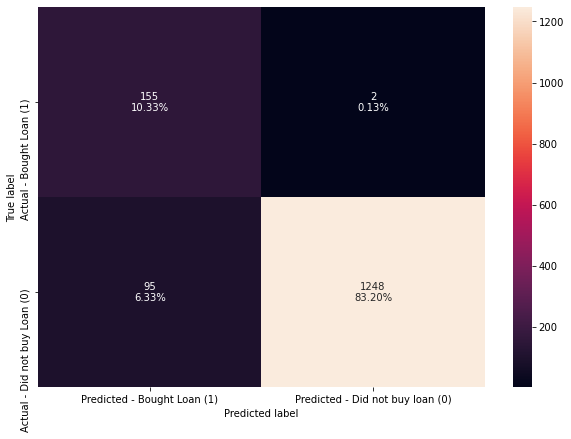

In [74]:
make_confusion_matrix(best_model, X_test,y_test)

In [75]:
scores_DT3 = get_metrics_score(best_model,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.9368571428571428
Accuracy on test set :  0.9353333333333333
Recall on training set :  0.9907120743034056
Recall on test set :  0.9872611464968153
Precision on training set :  0.5947955390334573
Precision on test set :  0.62
F1 on training set :  0.743321718931475
F1 on test set :  0.7616707616707616


In [76]:
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)


                         Imp
Income              0.621165
Education           0.155880
Family              0.154617
CCAvg               0.068338
Age                 0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


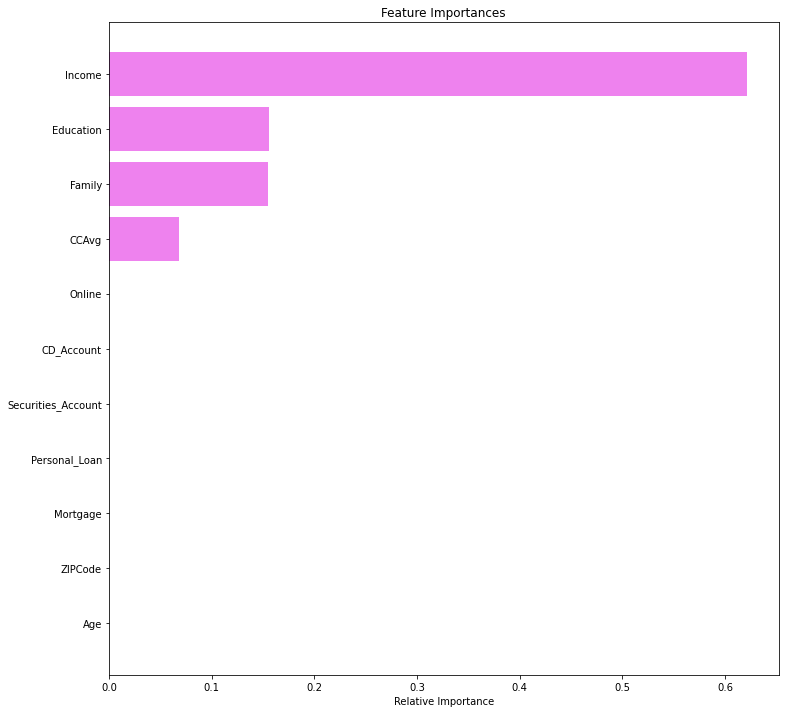

In [77]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Wow! we improved our recall in testing by 10% it is now 98.7%! This model is doing an incredibly good job at creating a list of people who would buy the loan. Now 98.7% of the people that would buy a loan were predicted to have bought a loan. This is probably the best model for this problem you can get.

You can see that the best tree has placed all of the importance on Income, Education, Family, and CCAvg. These are the key variables that have a strong relationship with the dependent variable.

Lets create a table comparing all 4 models:

In [78]:
data1={
    'model':['Logistic Regression - Baseline','Logistic Regression - Threshold =.1459 ','Decision Tree Baseline','Decision Tree Prepruned','Cost Complexity postPruned Decision Tree'],
    'Accuracy on training set' :[0.952,0.9142857142857143, 1.0,0.9974285714285714,0.9368571428571428],
    'Accuracy on test set':[0.9526666666666667,0.916,0.9786666666666667, 0.9753333333333334,0.9353333333333333],
    'Recall on training set':[0.6068111455108359,0.8390092879256966, 1.0,0.9721362229102167,0.9907120743034056],
    'Recall on test set':[0.6305732484076433,0.8789808917197452,0.9171974522292994,0.89171974522293,0.9872611464968153],
    'Precision on training set':[0.8270042194092827,0.5221579961464354,1.0,1.0,0.5947955390334573],
    'Precision on test set':[0.8839285714285714,0.563265306122449,0.8834355828220859, 0.875,0.62],
    'F1 on training set':[0.7000000000000001,0.6437054631828979,1.0,0.9858712715855572,0.743321718931475],
    'F1 on test set' :[0.7360594795539034,0.6865671641791045,0.9,0.8832807570977919,0.7616707616707616]
}
pd.DataFrame(data1)

,model,Accuracy on training set,Accuracy on test set,Recall on training set,Recall on test set,Precision on training set,Precision on test set,F1 on training set,F1 on test set
0,Logistic Regression - Baseline,0.952000,0.952667,0.606811,0.630573,0.827004,0.883929,0.700000,0.736059
1,Logistic Regression - Threshold =.1459,0.914286,0.916000,0.839009,0.878981,0.522158,0.563265,0.643705,0.686567
2,Decision Tree Baseline,1.000000,0.978667,1.000000,0.917197,1.000000,0.883436,1.000000,0.900000
3,Decision Tree Prepruned,0.997429,0.975333,0.972136,0.891720,1.000000,0.875000,0.985871,0.883281
4,Cost Complexity postPruned Decision Tree,0.936857,0.935333,0.990712,0.987261,0.594796,0.620000,0.743322,0.761671


# Actionable Insights & Recommendations
### Compare decision tree and Logistic regression 
* Both algorithms did a decent job at solving the problem and seem suited to it, especially after taking the time to scale before feeding into the Logistic Regression algorithm. 
* The Metrics were still better for the decision tree on all fronts though, boasting a near perfect recall score o0n the final model.
* The decision tree model is also much easier to interpret and implement.
* Some key differences between the Logistic Regression model and the Decision Tree model were the importance ranking of the features. The best Logistic Regression model recieved influence from many features however the best decision tree only used 4 features to split the data. Note: the 4 features were in the top 5 for the Logistic Regression
* Logistic Regression performance was probably limited because it relies on a hyperplane to bisect space around the target feature in the hyperspace of all the features.
* The decision tree algorithm instead uses simple slices to bisect the space into smaller and smaller regions and is much less limited. Because of this the Decision tree is unaffected by variance and outliers in the data. This makes it very robust however, the algorithm is also prone to overfitting and one must be careful when using a decision tree algorithm.


### Conclude with the key takeaways for the marketing team 
* Use the decision Tree classifier to reduce the list of customers you are sending the personal loan offer out to. 
* By doing this you will have targeted the vast majority of the bank customers who would be interested in buying the loan.

### what would your advice be on how to do this campaign?
* I would take this a step further and further split the people who would buy the loan into a set of high profile customers and a set of low profile customers. Then, I would specifically targetting the high profile customers first with personal relationship managers and competitive rates. I would target the lower profile customers with a more standard loan offer.

### Perform an Exploratory Data Analysis on the incorrectly predicted data in testing

* For this analysis, I will be using the best model I came up with

In [79]:
misclass_df=X_test.copy()
misclass_df['Actual']=y_test
misclass_df['Predicted']= best_model.predict(X_test)

In [80]:
pd.crosstab(misclass_df['Predicted'],misclass_df['Actual'],margins=True)

Actual,0,1,All
Predicted,,,
0,1248,2,1250
1,95,155,250
All,1343,157,1500


Above we can see how our best model classified the points. 

#### Correct classification:
* 1248 people were predicted to not buy a loan and did not buy a loan
* 155 people were predicted to buy a loan and did buy a loan

#### Incorrect classification:
* 95 people we predicted to buy a loan but did not buy a loan
* 2 people were predicted to not buy a loan but did buy a loan

<AxesSubplot:xlabel='Predicted'>

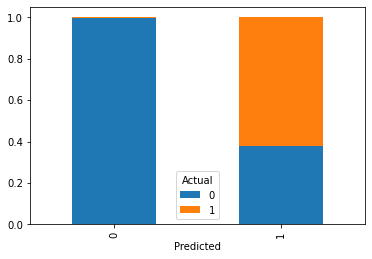

In [81]:
pd.crosstab(misclass_df['Predicted'],misclass_df['Actual'],normalize='index').plot(kind='bar',stacked=True)

Here is a visual representation of the information

In [82]:
# Rows that were classified as Negative when they were actually positive
#false negative rows
false_negative_rows = misclass_df[(misclass_df['Actual'] == 1) & (misclass_df['Predicted'] == 0)]
fn=pd.DataFrame(false_negative_rows)
fn

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Actual,Predicted
322,63,101,92007,1,3.9,1,0,1,1,1,0,1,0
1126,32,104,95192,2,3.7,1,0,0,0,0,1,1,0


Visual aids are not really needed here as there are only 2 entries. 
We can see that neither of these people had a mortgage and both fell into the ambiguous region of the CCAvg plot (between 2 and 4). They also both have a lower number of family members (3 and 4 family members had a higher probability of buying a loan). And also, both only have an undergraduate degree for education, while higher educated people tend to buy the loan more. 

In [83]:
# Rows that were classified as postive when they were actually negative
false_positive_rows = misclass_df[(misclass_df['Actual'] == 0) & (misclass_df['Predicted'] == 1)]
fp=pd.DataFrame(false_positive_rows)
fp

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Actual,Predicted
486,55,84,92173,2,3.7,1,304,1,0,1,0,0,1
4866,41,71,94801,2,3.2,1,0,0,0,1,1,0,1
3161,28,88,94024,1,5.4,1,0,0,0,1,0,0,1
2846,67,105,93711,4,1.7,2,0,0,0,1,0,0,1
2323,31,113,94542,2,2.0,2,315,0,0,0,0,0,1
2351,55,74,94611,2,3.2,3,0,0,0,1,1,0,1
4816,50,83,92333,3,3.0,2,0,0,0,0,1,0,1
4487,38,81,94583,1,3.6,2,0,0,0,1,1,0,1
3008,55,92,94550,1,3.0,3,158,0,0,0,1,0,1
1941,43,58,95307,2,3.2,1,0,0,0,1,0,0,1


Let's visualize the important features according to the model.
The features were: Income, Education, Family, and CCAvg

<AxesSubplot:xlabel='Income', ylabel='CCAvg'>

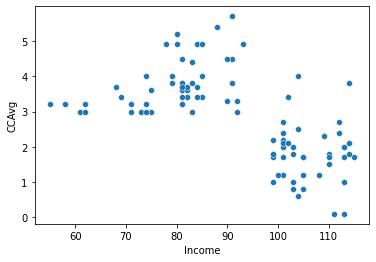

In [84]:
sns.scatterplot(x=fp['Income'], y=fp['CCAvg'])

Here, we can see that all points are greater than 55k/year for income. And most are greater than 75k. Higher income people have a better chance to be predicted to take a loan offer.
Also plotted is CCAvg:
A good number of the points show CCAvg>2.
When CCAvg is greater than 2, there is an increasing chance the person would buy the loan and as it increases further the chances of buying the loan also increase.

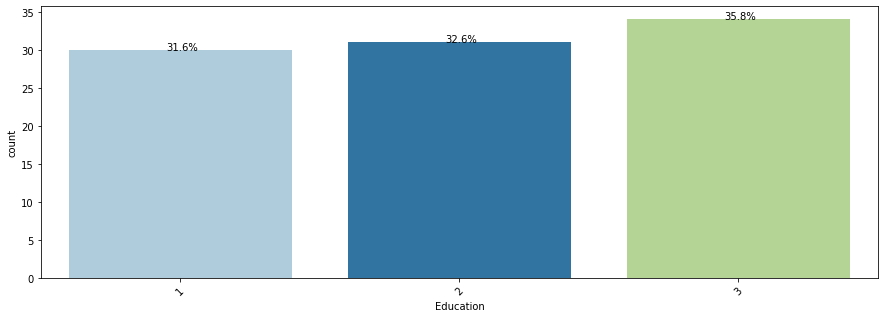

In [85]:
perc_on_bar(fp,'Education')

Here, we can see that 69% had education at 2 or higher, which would lead to a false positive classification

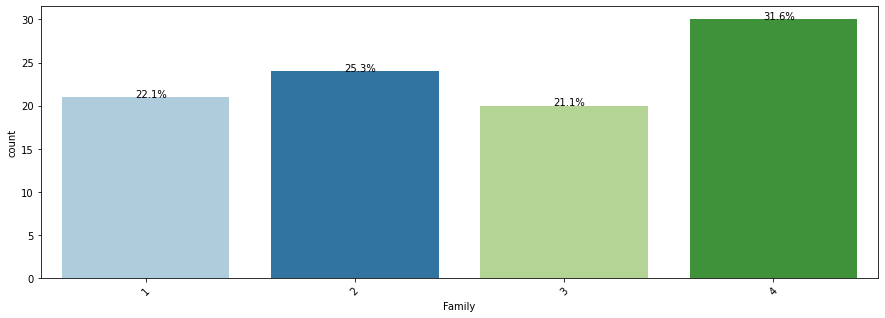

In [86]:
perc_on_bar(fp,'Family')

A little over half of the false positives also fit into the 3 or 4 person family category, which pushed the model towards predicting that they bought a personal loan.

# Notebook - Overall Conclusions

* I was able to create a predictive model that can be used by allLife bank to determine which of their customers would be interested in buying a loan. 
* Both a Logistic Regression Model and a Decision Tree Classifier Model were used to solve this problem.
* The Decision Tree Classifier performed better than the logistic regression model on all metrics with 98.7% recall and 93.5% accuracy.
* From this model it was determined that the most important features in determining if someone would buy a loan is their Income, level of Education, Family size, and their average credit card spending. 


I think the models here are a good start to growing the bank buisness, as customers can't accept a loan offer you didn't make to them. These models skim out all of the people who deffinitely wouldn't buy the loan so you don't waste those resources. Some improvements to this model would be to further divide into 2 customer profiles: high profile, and low profile customers. 

Things to try: 
1. Binning of certain features such as age, income, and mortgage could possibly have a positive effect on modelling. This would also be the first step to  customer profiling 
2. The outliers in this data set were not excessive, however if they had been capped for the logistic regression algorithm, some further performance improvements may be possible.